In [1]:
# Import necessary libraries

import pandas as pd

In [2]:
# Read the dataset

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking for the statistical properties of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
# For checking normalization of data, you do it one feature at a time
# 1. Check for minimum and maximum values. Compare and Ensure that the logical centre point is close or same as the 50th percentile. 
# 2. Compare the 50th percentile with the mean. if they are close, then it is a normal distribution. 
# In a normal distribution, the mean, the median and the 50th percentile all lie at the same point. 

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Statistical challenges with our data

1. Very wide scales in the features: Requires rescaling
2. Very high standard deviation in the features: Requires standardization
3. Non Normal distribution: Requires normalization

SyntaxError: invalid syntax (553214769.py, line 3)

<AxesSubplot:ylabel='Density'>

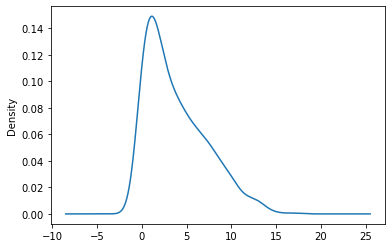

In [7]:
import matplotlib.pyplot as plt

df.Pregnancies.plot(kind="density")

In [8]:
# During rescaling of data, it is normal to go from 0 to 1, but you can go from -1 to 1 when you are dealing with audio data,
# timeseries data, frequency(heartbeat) data. this is because the wave point tend to ondulate, meaning the values can fall below
# 0 and rise above 0. 

In [9]:
# RESCALING

# Rescale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# First, convert the data to an array
# We never rescale our outcome variable because it is the dependent variable. They depend on the rest of the data, which are the
# input variables or independent variables.

dfArr = df.values

# .values is a function that converts a dataframe into an array, where each row is treated as a list.

# X = dfArr[0:767,0:8]
# Y = dfArr[0:767, 8]

X = dfArr[:,0:8]
Y = dfArr[:, 8]

In [10]:
from numpy import set_printoptions

In [11]:
scaler = MinMaxScaler(feature_range=(0,1)) # Calling the constructor of the MinMaxScaler Class and also specify range.
rescaledX = scaler.fit_transform(X)
# Summarize transformed data
set_printoptions(precision=3)
print(rescaledX)

[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


In [12]:
# Change rescaledX back to a dataframe and adding back Y

rescaledXdf = pd.DataFrame(rescaledX, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Adding back the outcome column
rescaledXdf["Outcome"] = df["Outcome"]

print(rescaledXdf)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [13]:
rescaledXdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
Outcome,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


In [14]:
# Standardizing the original data

from sklearn.preprocessing import StandardScaler

dfArr = df.values

X = dfArr[:,0:8]
Y = dfArr[:,8]

scaler = StandardScaler().fit(X) # fitting X on the scaler.forcing a representation of the data thats as close to the mean as possible, .fit finds the line of best fit on the data
rescaledX_std = scaler.transform(X) # .transform transform all the data point to align very close to mean.  
# Summarize transformed data
set_printoptions(precision=3)

print(rescaledX_std)

[[ 0.64   0.848  0.15  ...  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ... -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ... -1.103  0.604 -0.106]
 ...
 [ 0.343  0.003  0.15  ... -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ... -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ... -0.202 -0.474 -0.871]]


In [15]:
# Change rescaledX_std back to a dataframe and adding back Y

rescaledXDF_std = pd.DataFrame(rescaledX_std, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Adding back the outcome column
rescaledXDF_std["Outcome"] = df["Outcome"]

print(rescaledXDF_std)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [16]:
rescaledXDF_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,3.614007e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,-1.327244e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,7.994184e-17,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.556183e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.295979e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.462585e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [18]:
# STANDARDIZING THE RESCALED DATA
# CONTINUINING THE TRANSFORMATION USING THE OUTPUT FROM THE RESCALING TRANSFORMATION STAGE

# Call the constructor of the standard scaler
from sklearn.preprocessing import StandardScaler
## rescaledXdf

rescaledXdf_Arr = rescaledXdf.values

X = rescaledXdf_Arr[:, 0:8]
Y = rescaledXdf_Arr[:, 8]

scaler = StandardScaler().fit(X)
rescaledX_std = scaler.transform(X)
# Summarize transformed data
set_printoptions(precision=3)

# print(rescaledX_std)

# Change rescaledX_std back to a dataframe and adding back Y

rescaledXDF_R_S = pd.DataFrame(rescaledX_std, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Adding back the outcome column
rescaledXDF_R_S["Outcome"] = rescaledXdf["Outcome"]

print(rescaledXDF_R_S)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [19]:
# Inspecting the rescaled and standardized data
rescaledXDF_R_S.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,5.493291e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,2.620878e-16,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,4.771845e-16,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,-1.750625e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,9.569891e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,-2.201653e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,3.635691e-17,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,4.770490e-18,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

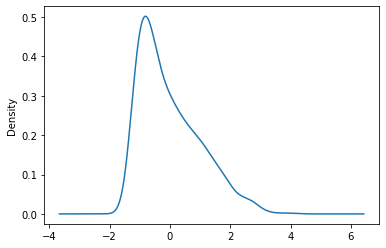

In [20]:
rescaledXDF_R_S.Pregnancies.plot(kind="density")

In [21]:
# IMPLEMENTING NORMALIZATION ON THE RESCALED AND STANDARDIZED DATA
# Normalization works almost like standardization. You first fit to get the line of best fit and then you transform to force
# everything into a gushier distribution.

# Call the constructor of the normalizer class or call the normalizer library 
from sklearn.preprocessing import Normalizer

rescaledXDF_R_S_Arr = rescaledXDF_R_S.values

X = rescaledXDF_R_S_Arr[:, 0:8]
Y = rescaledXDF_R_S_Arr[:, 8]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# Summarize transformed data
set_printoptions(precision=3)

# print(normalizedX)

# Change rescaledX_std back to a dataframe and adding back Y

normalizedX_R_S_N = pd.DataFrame(normalizedX, columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# Adding back the outcome column
normalizedX_R_S_N["Outcome"] = rescaledXDF_R_S["Outcome"]

print(normalizedX_R_S_N)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.293647  0.389263       0.068664       0.416311 -0.317941  0.093614   
1      -0.458093 -0.609101      -0.087047       0.287852 -0.375682 -0.371091   
2       0.408951  0.644218      -0.087479      -0.426959 -0.229648 -0.365657   
3      -0.425010 -0.502137      -0.080761       0.077736  0.062026 -0.248523   
4      -0.186954  0.082528      -0.246360       0.148546  0.125389  0.230816   
..           ...       ...            ...            ...       ...       ...   
763     0.474619 -0.161678       0.092553       0.447334  0.225917  0.029905   
764    -0.412899  0.026072       0.034849       0.305535 -0.522147  0.459799   
765     0.297611  0.002864       0.129846       0.134092  0.242609 -0.637939   
766    -0.391110  0.073968      -0.217909      -0.596333 -0.320749 -0.111194   
767    -0.457286 -0.472513       0.025030       0.355247 -0.375020 -0.109400   

     DiabetesPedigreeFunction       Age

In [22]:
normalizedX_R_S_N.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-0.029202,0.372804,-0.778874,-0.329314,-0.116355,0.266900,0.891015
Glucose,768.0,-0.035199,0.370004,-0.917873,-0.302614,-0.051836,0.226748,0.936682
BloodPressure,768.0,0.015273,0.304359,-0.891431,-0.137178,0.049074,0.215058,0.772424
SkinThickness,768.0,0.008376,0.386974,-0.829106,-0.324046,0.057186,0.327209,0.818977
Insulin,768.0,-0.020091,0.328127,-0.644321,-0.272916,-0.147720,0.187654,0.899737
BMI,768.0,-0.013928,0.338886,-0.909906,-0.270521,0.000576,0.222935,0.851350
DiabetesPedigreeFunction,768.0,-0.033374,0.342877,-0.773632,-0.290049,-0.123026,0.186248,0.913122
Age,768.0,-0.049970,0.369252,-0.732146,-0.355483,-0.140985,0.227950,0.909759
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

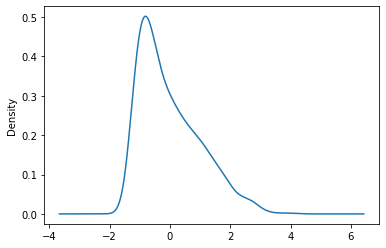

In [23]:
rescaledXDF_R_S.Pregnancies.plot(kind="density")

<AxesSubplot:ylabel='Density'>

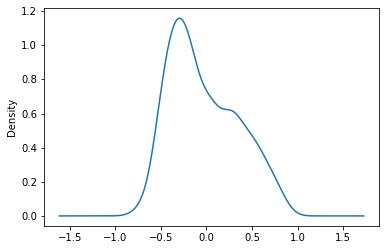

In [24]:
normalizedX_R_S_N.Pregnancies.plot(kind="density")

In [27]:
# SAVING THE DATASET INTO CSV FORMAT

normalizedX_R_S_N.to_csv("Transformed Diabetes Data.csv", index=False)